<a href="https://colab.research.google.com/github/Songnahyun/Section4_Project/blob/main/Section4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터 전처리

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tripadvisor_hotel_reviews.csv')

In [ ]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [ ]:
# 평점 3점 초과는 긍정리뷰, 3점 이하는 부정리뷰 => 이진분류로 변경
import numpy as np
df['label'] = np.nan
df.loc[df['Rating'] > 3, ['label']] = 1
df.loc[df['Rating'] <= 3, ['label']] = 0

In [ ]:
df = df.astype({'label':'int'})

In [ ]:
df.drop(columns = ['Rating'], inplace = True)
df.head()

,Review,label
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",1


In [ ]:
df['label'].value_counts() #1 -> 긍정, 0-> 부정

1    15093
0     5398
Name: label, dtype: int64

In [ ]:
df.shape

(20491, 2)

In [ ]:
df.drop_duplicates(subset=['Review'], inplace=True) # Reviews 열 중복 제거
print('총 샘플의 수 :',len(df))

총 샘플의 수 : 20491


In [ ]:
print(df.isnull().sum())

Review    0
label     0
dtype: int64


In [ ]:
# train, test spilt
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.25, random_state = 42)
train.shape, test.shape

((15368, 2), (5123, 2))

###1) 토큰화

In [ ]:
#토큰화
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [ ]:
import re
def lower_and_regex(sentence):
    # 대문자를 소문자로 변경
    sentence = sentence.lower()
    # 정규표현식을 이용하여 알파벳 소문자, 숫자 이외 구두점 삭제
    sentence = re.sub(r"[^a-z0-9 ]", "", sentence)
    return sentence

In [ ]:
train['tokens'] = train['Review'].apply(lower_and_regex)

total_tokens_prep = []

for prep_sent in tokenizer.pipe(train['tokens']):
    sent_token_prep = [token.text for token in prep_sent]
    total_tokens_prep.append(sent_token_prep)

train['tokens'] = total_tokens_prep

In [ ]:
train.head()

,Review,label,tokens
700,"hated, disappointed hotel.when reservations mo...",0,"[hated, disappointed, hotelwhen, reservations,..."
14362,great hotel whilst not completely central 2 tu...,1,"[great, hotel, whilst, not, completely, centra..."
19195,tasteful friendly well-located small hotel wel...,1,"[tasteful, friendly, welllocated, small, hotel..."
18124,good value money hotel located western city bl...,1,"[good, value, money, hotel, located, western, ..."
3693,riu bambu imagined just got punta cana riu bam...,1,"[riu, bambu, imagined, just, got, punta, cana,..."


In [ ]:
test['tokens'] = test['Review'].apply(lower_and_regex)

total_tokens_prep = []

for prep_sent in tokenizer.pipe(test['tokens']):
    sent_token_prep = [token.text for token in prep_sent]
    total_tokens_prep.append(sent_token_prep)

test['tokens'] = total_tokens_prep

In [ ]:
test.head()

,Review,label,tokens
10726,not recommend hotel did reviewers actually sta...,0,"[not, recommend, hotel, did, reviewers, actual..."
14919,"barcelona rocks, stayed hotel jazz girlfriend ...",1,"[barcelona, rocks, stayed, hotel, jazz, girlfr..."
19098,ok hotel good location stayed night way beijin...,0,"[ok, hotel, good, location, stayed, night, way..."
2450,great service nice pool ok beach lovely ground...,1,"[great, service, nice, pool, ok, beach, lovely..."
960,surprising treat spent weekend july 15/16 2006...,1,"[surprising, treat, spent, weekend, july, 1516..."


###2) 불용어 처리

In [ ]:
#불용어 처리

print(nlp.Defaults.stop_words)

{'it', 'anything', 'bottom', 'must', 'even', 'when', 'there', 'their', 'so', 'very', '’ll', 'eleven', 'against', 'part', 'sixty', 'however', 'further', 'hereupon', '’m', 'rather', 'toward', 'former', 'and', 'yourselves', 'being', 'towards', 'of', "'ll", 'few', 'otherwise', 'through', 'in', 'perhaps', 'him', 'name', 'anyway', 'own', 'make', '‘m', 'what', 'go', 'fifty', 'these', 'whenever', 'full', 'forty', 'whereafter', 'around', 'alone', 'than', 'two', 'or', 'various', "'m", 'where', 'hence', '’s', 'put', 'will', '‘s', 'six', 'while', 'please', 'that', 'onto', 'serious', 'themselves', 'doing', 'seemed', 'though', 'off', 'both', 'am', 'used', 'within', 'once', 'my', 'over', 'whether', 'should', 'is', 'take', 'i', 'next', 'although', 'all', 'beforehand', 'get', 'amount', 'those', 'did', 'not', 'but', 'whom', 'anyone', 'due', 'the', 'last', 'may', 'whole', 'along', 'nevertheless', 'never', '’ve', 'can', 'to', 'almost', 'seeming', 'one', 'also', 'with', 'as', 'well', "'ve", 'they', 'ca', '

In [ ]:
STOP_WORDS = nlp.Defaults.stop_words

In [ ]:
tokens = []
for token in train['tokens']:
  tokens.append([word for word in token if word not in STOP_WORDS])

train['tokens'] = tokens

In [ ]:
train.head()

,Review,label,tokens
700,"hated, disappointed hotel.when reservations mo...",0,"[hated, disappointed, hotelwhen, reservations,..."
14362,great hotel whilst not completely central 2 tu...,1,"[great, hotel, whilst, completely, central, 2,..."
19195,tasteful friendly well-located small hotel wel...,1,"[tasteful, friendly, welllocated, small, hotel..."
18124,good value money hotel located western city bl...,1,"[good, value, money, hotel, located, western, ..."
3693,riu bambu imagined just got punta cana riu bam...,1,"[riu, bambu, imagined, got, punta, cana, riu, ..."


In [ ]:
tokens = []
for token in test['tokens']:
  tokens.append([word for word in token if word not in STOP_WORDS])

test['tokens'] = tokens

In [ ]:
X_train = train['tokens'].values
y_train = train['label'].values
X_test= test['tokens'].values
y_test = test['label'].values

###3) 정수 인코딩

In [ ]:
# 정수 인코딩 
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
# 높은 번호 일수록 등장 빈도가 낮음
print(tokenizer.word_index)

{'hotel': 1, 'room': 2, 'great': 3, ' ': 4, 'nt': 5, 'good': 6, 'staff': 7, 'stay': 8, 'nice': 9, 'rooms': 10, 'location': 11, 'stayed': 12, 'service': 13, 'time': 14, 'beach': 15, 'night': 16, 'clean': 17, 'day': 18, 'breakfast': 19, 'food': 20, 'like': 21, 'resort': 22, 'place': 23, 'pool': 24, 'people': 25, 'friendly': 26, 'small': 27, 'little': 28, 'got': 29, 'walk': 30, 'excellent': 31, 'area': 32, '2': 33, 'best': 34, 'helpful': 35, 'restaurant': 36, 'bar': 37, 'bathroom': 38, 'bed': 39, 'restaurants': 40, 'water': 41, 'recommend': 42, 'trip': 43, 'went': 44, 'beautiful': 45, 'floor': 46, 'view': 47, 'desk': 48, 'comfortable': 49, 'nights': 50, '3': 51, '5': 52, 'right': 53, 'want': 54, 'better': 55, 'free': 56, 'way': 57, 'hotels': 58, 'wonderful': 59, 'city': 60, 'away': 61, 'bit': 62, 'booked': 63, 'large': 64, 'price': 65, 'reviews': 66, 'street': 67, 'minutes': 68, 'buffet': 69, 'new': 70, 'days': 71, 'lobby': 72, '4': 73, 'going': 74, 'experience': 75, 'loved': 76, 'close':

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수를 key와 value 형태로
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면 +1
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합의 크기 :',total_cnt)
print('등장 빈도가 1번 이하인 단어의 수: %s'%(rare_cnt))
print("전체 등장 빈도에서 빈도가 1이하인 단어의 등장 비율:", (rare_freq / total_freq)*100)

단어 집합의 크기 : 67293
등장 빈도가 1번 이하인 단어의 수: 41235
전체 등장 빈도에서 빈도가 2이하인 단어의 등장 비율: 2.673639027932671


In [ ]:
# 전체 단어 중에서 빈도가 1번 이하인 단어 등장 빈도의 비율은 약 3%이므로 제거
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 26059


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

리뷰 최대 길이 : 1844
리뷰 평균 길이 : 100.35658511192088


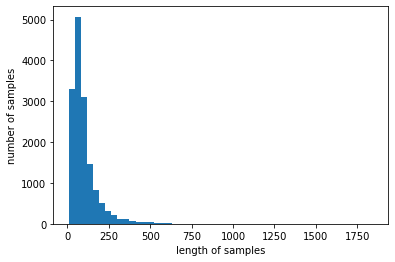

In [ ]:
import matplotlib.pyplot as plt
print('리뷰 최대 길이 :',max(len(review) for review in X_train))
print('리뷰 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('길이가 %s 이하인 리뷰 : %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 500
below_threshold_len(max_len, X_train)

길이가 500 이하인 리뷰 : 99.10853722019782


###4) 패딩

In [ ]:
# 99%의 리뷰가 500 이하이므로 500으로 패딩처리
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen = 500)
X_test = pad_sequences(X_test, maxlen = 500)

## 2. Modeling(LSTM)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 128
hidden_units = 128

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(hidden_units),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

unicorns = model.fit(X_train, y_train, 
                     epochs = 50, 
                     callbacks=[ES], 
                     batch_size = 64, 
                     validation_split=0.2)

Epoch 1/50
193/193 [==============================] - 264s 1s/step - loss: 0.4206 - accuracy: 0.8114 - val_loss: 0.3329 - val_accuracy: 0.8572
Epoch 2/50
193/193 [==============================] - 260s 1s/step - loss: 0.2052 - accuracy: 0.9231 - val_loss: 0.3078 - val_accuracy: 0.8712
Epoch 3/50
193/193 [==============================] - 262s 1s/step - loss: 0.1407 - accuracy: 0.9526 - val_loss: 0.3678 - val_accuracy: 0.8722
Epoch 4/50
193/193 [==============================] - 261s 1s/step - loss: 0.0708 - accuracy: 0.9770 - val_loss: 0.5034 - val_accuracy: 0.8712
Epoch 5/50
193/193 [==============================] - 259s 1s/step - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.6048 - val_accuracy: 0.8682
Epoch 6/50
193/193 [==============================] - 258s 1s/step - loss: 0.0493 - accuracy: 0.9849 - val_loss: 0.5977 - val_accuracy: 0.8630
Epoch 6: early stopping


In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
acc

161/161 - 29s - loss: 0.6053 - accuracy: 0.8620 - 29s/epoch - 178ms/step


0.8619949221611023

In [ ]:
#교차 검증
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
import numpy as np


seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

embedding_dim = 128
hidden_units = 128

n_fold = 3
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

accuracy = []

for train, val in skf.split(X_train, y_train):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(hidden_units),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
    model.fit(X_train[train], y_train[train], epochs = 3, batch_size = 500)
    k_accuracy = "%.4f" %(model.evaluate(X_train[train], y_train[train])[1])
    accuracy.append(k_accuracy)

print("\n %.f fold accuracy :" %(n_fold), accuracy)

Epoch 1/3
21/21 [==============================] - 115s 5s/step - loss: 0.5978 - accuracy: 0.7187
Epoch 2/3
21/21 [==============================] - 107s 5s/step - loss: 0.4317 - accuracy: 0.7916
Epoch 3/3
321/321 [==============================] - 42s 129ms/step - loss: 0.1577 - accuracy: 0.9397
Epoch 1/3
21/21 [==============================] - 179s 5s/step - loss: 0.6054 - accuracy: 0.7287
Epoch 2/3
21/21 [==============================] - 102s 5s/step - loss: 0.4484 - accuracy: 0.7694
Epoch 3/3
321/321 [==============================] - 42s 130ms/step - loss: 0.3298 - accuracy: 0.8538
Epoch 1/3
21/21 [==============================] - 106s 5s/step - loss: 0.5909 - accuracy: 0.7221
Epoch 2/3
21/21 [==============================] - 104s 5s/step - loss: 0.4455 - accuracy: 0.7772
Epoch 3/3
321/321 [==============================] - 44s 136ms/step - loss: 0.1973 - accuracy: 0.9298

 3 fold accuracy : ['0.9397', '0.8538', '0.9298']


In [ ]:
acc = list(map(float, accuracy))
K_acc = sum(acc) / len(acc)
K_acc

0.9077666666666667

##3. 예측해보기

In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 55.6 MB/s 


In [ ]:
from konlpy.tag import Okt

okt = Okt()

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r"[^a-z0-9 ]", "", new_sentence)
  tokenized_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in STOP_WORDS] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict('The hotel is very beautiful and smells good')

65.85% 확률로 긍정 리뷰입니다.

